#Worksheet - 1

##Installation and Mounting Google Drive

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
# !pip install pillow
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

##Exercise - 1:

###1. Read and Display Image

In [23]:
colored_image = Image.open("/content/drive/MyDrive/AI and ML/Week1/Lenna Image from Herald College.png");

In [24]:
print("Format: ", colored_image.format)
print("Mode: ", colored_image.mode)
print("Size: ", colored_image.size)

Format:  PNG
Mode:  RGBA
Size:  (366, 357)


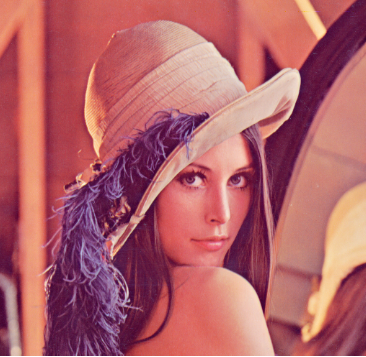

In [25]:
colored_image = colored_image.convert("RGB")
display(colored_image)

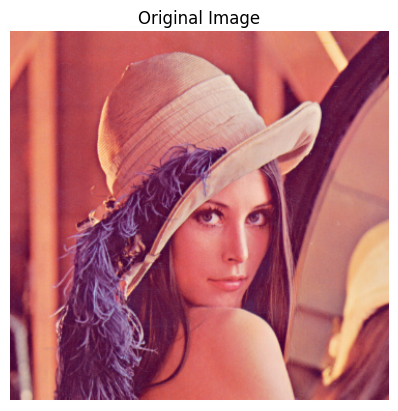

In [26]:
image_array = np.array(colored_image)
plt.imshow(image_array)
plt.axis("off")
plt.title("Original Image")
plt.show()

###2. Display top corner of 100*100 pixels

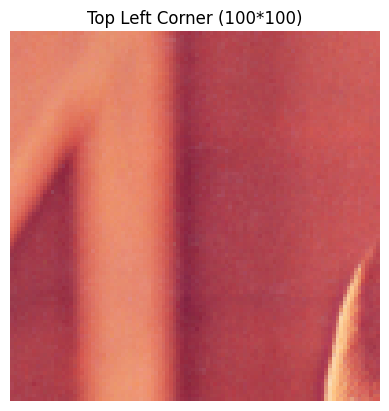

In [27]:
image_array = np.array(colored_image)

top_left = image_array[:100, :100]

plt.axis("off")
plt.title("Top Left Corner (100*100)")
plt.imshow(top_left)
plt.show()

###3. Displaying Color Channels

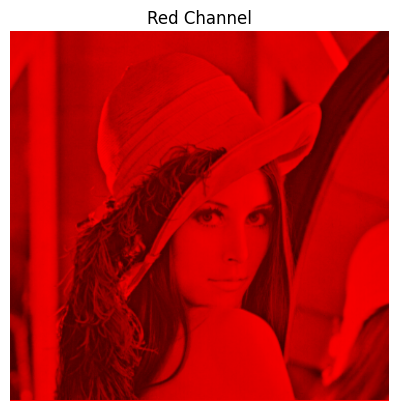

In [28]:
red_channel = image_array.copy()
red_channel[:, :, 1] = 0
red_channel[:, :, 2] = 0
plt.axis("off")
plt.title("Red Channel")
plt.imshow(red_channel)
plt.show()

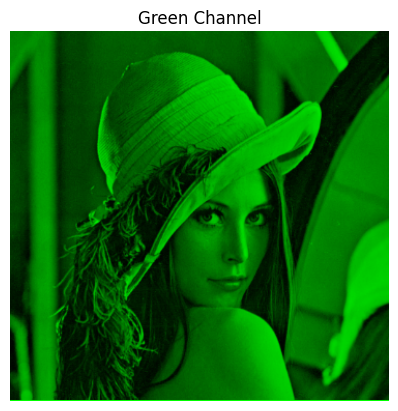

In [29]:
green_channel = image_array.copy()
green_channel[:, :, 0] = 0
green_channel[:, :, 2] = 0
plt.axis("off")
plt.title("Green Channel")
plt.imshow(green_channel)
plt.show()

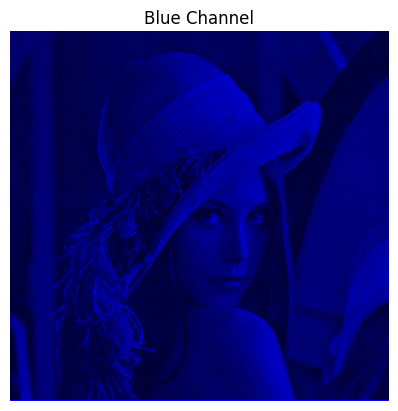

In [30]:
blue_channel = image_array.copy()
blue_channel[:, :, 1] = 0
blue_channel[:, :, 0] = 0
plt.axis("off")
plt.title("Blue Channel")
plt.imshow(blue_channel)
plt.show()

###4. Top 100 * 100 modification

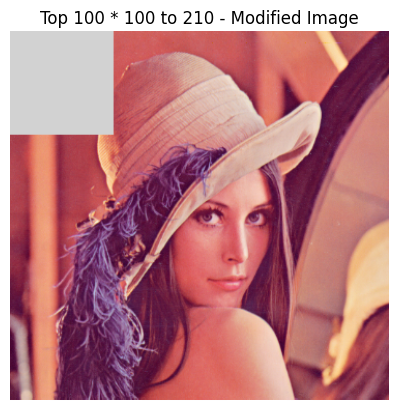

In [31]:
image_modified = image_array.copy()
image_modified[:100, :100] = 210

plt.axis("off")
plt.title("Top 100 * 100 to 210 - Modified Image")
plt.imshow(image_modified)
plt.show()

##Exercise - 2:

###1. Load and Display Grayscale Image

In [32]:
image_grayscale = Image.open("/content/drive/MyDrive/AI and ML/Week1/Camera Man from Herald College.jpg").convert("L")

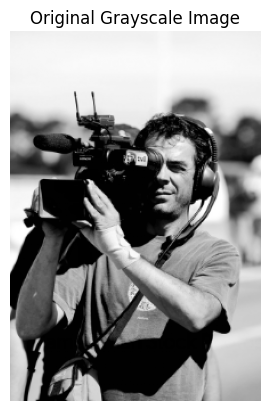

In [33]:
image_array = np.array(image_grayscale)

plt.title("Original Grayscale Image")
plt.axis("off")
plt.imshow(image_array, cmap="gray")
plt.show()

###2. Extract Middle 150 pixels of Image

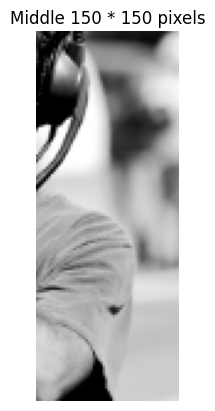

In [34]:
width, height = image_array.shape

col_start = (width // 2)
row_start = (height // 2 )
mid_section = image_array[row_start:row_start+150, col_start:col_start+150]


plt.title("Middle 150 * 150 pixels")
plt.axis("off")
plt.imshow(mid_section, cmap="gray")
plt.show()

### 3.Apply a simple threshold to Image

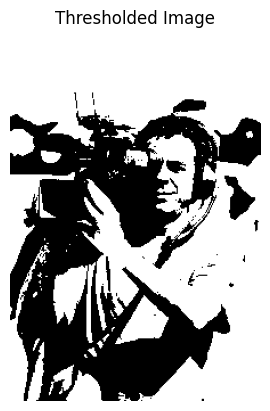

In [35]:
binary_image = np.zeros_like(image_array, dtype=np.uint8)

height, width = image_array.shape

for i in range(height):
    for j in range(width):
        if image_array[i, j] < 100:
            binary_image[i, j] = 0
        else:
            binary_image[i, j] = 255

plt.title("Thresholded Image")
plt.axis("off")
plt.imshow(binary_image, cmap="gray")
plt.show()

###4. Rotate Image 90 deg

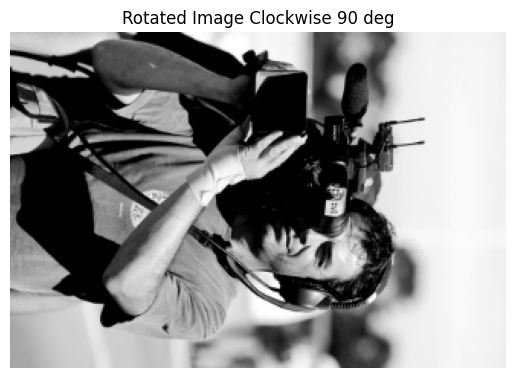

In [36]:
rotate_image = image_grayscale.rotate(-90, expand = True)

plt.title("Rotated Image Clockwise 90 deg")
plt.axis("off")
plt.imshow(rotate_image, cmap="gray")
plt.show()

###5. Convert Grayscale to RGB image

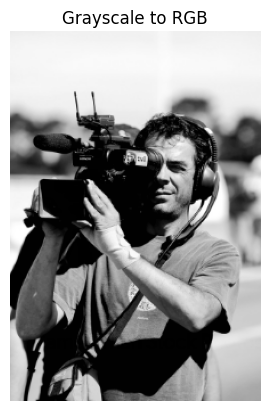

In [37]:
image_colored = Image.merge("RGB", (image_grayscale, image_grayscale, image_grayscale))

plt.title("Grayscale to RGB")
plt.axis("off")
plt.imshow(image_colored, cmap="gray")
plt.show()

##Exercise - 3:

###1. Load and Prepare Data

In [38]:
image = Image.open("/content/drive/MyDrive/AI and ML/Week1/Lenna Image from Herald College.png").convert("L")

(357, 366)


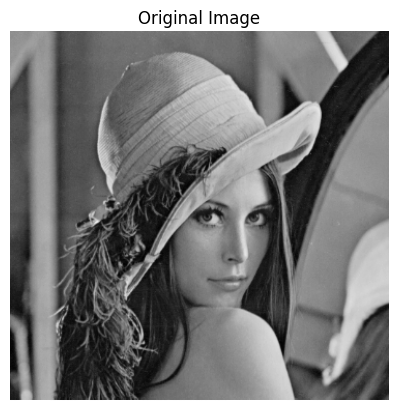

In [39]:
image_array = np.array(image)
print(image_array.shape)

height, width = image_array.shape

data = image_array.copy()

plt.title("Original Image")
plt.axis("off")
plt.imshow(image_array, cmap='gray')
plt.show()

In [40]:
mean = np.mean(data, axis = 0)
centered_data = data - mean
centered_data

array([[ 61.34173669,  62.17647059,  62.83473389, ..., -82.04761905,
        -83.96638655, -87.30252101],
       [ 63.34173669,  61.17647059,  62.83473389, ..., -84.04761905,
        -83.96638655, -85.30252101],
       [ 61.34173669,  65.17647059,  61.83473389, ..., -81.04761905,
        -82.96638655, -87.30252101],
       ...,
       [-46.65826331, -45.82352941, -42.16526611, ..., -44.04761905,
        -32.96638655, -31.30252101],
       [-44.65826331, -42.82352941, -42.16526611, ..., -39.04761905,
        -28.96638655, -31.30252101],
       [161.34173669, 161.17647059, 160.83473389, ..., 123.95238095,
        124.03361345, 123.69747899]])

In [41]:
cov_matrix = np.cov(centered_data, rowvar = False)
cov_matrix

array([[1482.61322507, 1444.75413087, 1404.48079344, ..., -477.00334403,
        -463.70533944, -416.64351808],
       [1444.75413087, 1430.68506279, 1399.06857237, ..., -546.38764045,
        -531.51999339, -485.93803701],
       [1404.48079344, 1399.06857237, 1391.50350927, ..., -581.36182451,
        -565.21914833, -521.85069871],
       ...,
       [-477.00334403, -546.38764045, -581.36182451, ..., 3069.65783842,
        3039.86677368, 3007.1540931 ],
       [-463.70533944, -531.51999339, -565.21914833, ..., 3039.86677368,
        3036.6898782 , 3021.25177037],
       [-416.64351808, -485.93803701, -521.85069871, ..., 3007.1540931 ,
        3021.25177037, 3034.25092059]])

In [42]:
cov_matrix.shape

(366, 366)

###2. Eigen Decomposition and Identifying Pricipal Components

In [43]:
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

In [44]:
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

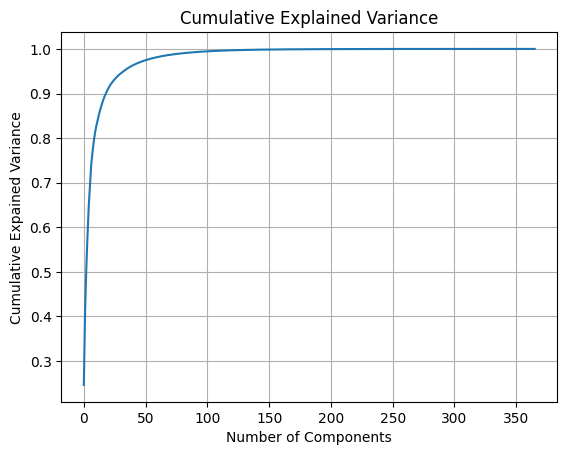

In [45]:
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
plt.plot(np.cumsum(explained_variance_ratio))
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Expained Variance")
plt.grid(True)
plt.show()

### 3.Reconstruction and Experiment

In [46]:
k1 = 10
k2 = 20
k3 = 50
k4 = 100
k5 = 150

components1 = eigenvectors[:, :k1]
components2 = eigenvectors[:, :k2]
components3 = eigenvectors[:, :k3]
components4 = eigenvectors[:, :k4]
components5 = eigenvectors[:, :k5]

In [47]:
compressed_data1 = np.dot(centered_data, components1)
compressed_data2 = np.dot(centered_data, components2)
compressed_data3 = np.dot(centered_data, components3)
compressed_data4 = np.dot(centered_data, components4)
compressed_data5 = np.dot(centered_data, components5)

In [48]:
decompressed_data1 = np.dot(compressed_data1, components1.T) + mean
decompressed_data2 = np.dot(compressed_data2, components2.T) + mean
decompressed_data3 = np.dot(compressed_data3, components3.T) + mean
decompressed_data4 = np.dot(compressed_data4, components4.T) + mean
decompressed_data5 = np.dot(compressed_data5, components5.T) + mean

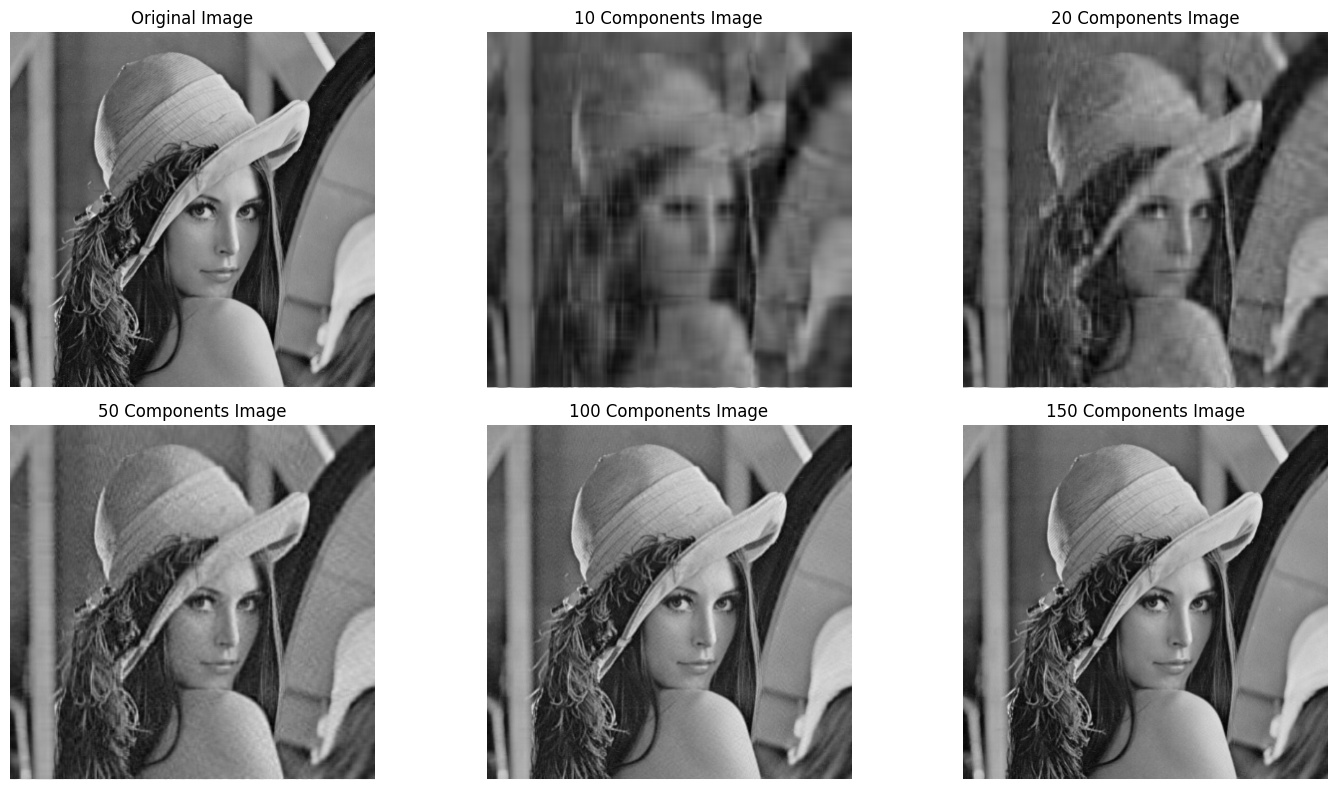

In [49]:
plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
plt.imshow(image_array, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(decompressed_data1, cmap="gray")
plt.title("10 Components Image")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(decompressed_data2, cmap="gray")
plt.title("20 Components Image")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(decompressed_data3, cmap="gray")
plt.title("50 Components Image")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(decompressed_data4, cmap="gray")
plt.title("100 Components Image")
plt.axis("off")

plt.subplot(2, 3, 6)
plt.imshow(decompressed_data5, cmap="gray")
plt.title("150 Components Image")
plt.axis("off")

plt.tight_layout()
plt.show()
